In [2]:
#import necessary libraries
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical



In [4]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Explanatory analysis

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


TypeError: only integer scalar arrays can be converted to a scalar index

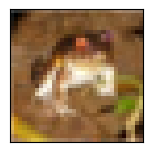

In [7]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[x_test[i][0]])

plt.show()


In [7]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
782/782 [==============================] - 34s 44ms/step - loss: 0.1758 - accuracy: 0.9408 - val_loss: 0.8367 - val_accuracy: 0.7965
Epoch 2/10
782/782 [==============================] - 34s 44ms/step - loss: 0.1736 - accuracy: 0.9426 - val_loss: 0.8698 - val_accuracy: 0.8021
Epoch 3/10
782/782 [==============================] - 34s 44ms/step - loss: 0.1705 - accuracy: 0.9433 - val_loss: 0.8954 - val_accuracy: 0.7952
Epoch 4/10
782/782 [==============================] - 35s 44ms/step - loss: 0.1761 - accuracy: 0.9413 - val_loss: 0.8466 - val_accuracy: 0.7988
Epoch 5/10
782/782 [==============================] - 35s 44ms/step - loss: 0.1715 - accuracy: 0.9426 - val_loss: 0.9193 - val_accuracy: 0.7816
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.1736 - accuracy: 0.9424 - val_loss: 0.8228 - val_accuracy: 0.8025
Epoch 7/10
782/782 [==============================] - 35s 44ms/step - loss: 0.1723 - accuracy: 0.9427 - val_loss: 0.8426 - val_accuracy:

Text(0.5, 1.0, 'Loss Curves')

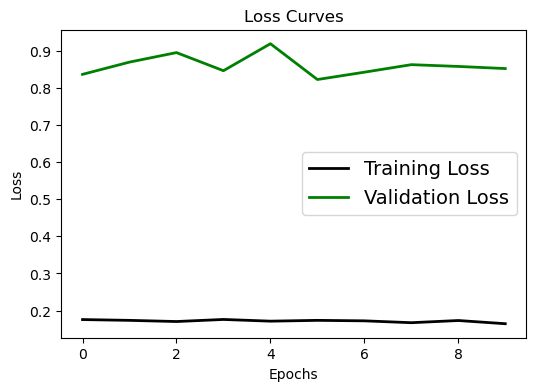

In [14]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


Text(0.5, 1.0, 'Accuracy Curves')

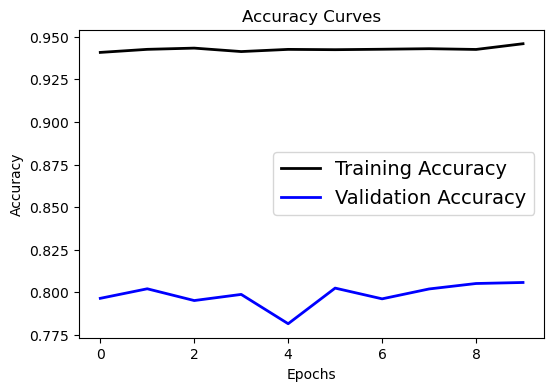

In [15]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)


In [18]:
# Evaluate the model


# Print the final loss score
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



313/313 [==============================] - 3s 8ms/step - loss: 0.8524 - accuracy: 0.8058
Test Loss: 0.852377712726593
Test Accuracy: 0.8058000206947327
